# Load Package and data

In [128]:
# Import necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [129]:
# Load the data
df = pd.read_csv('Data_Leakage_Detection.csv')

# EDA

In [130]:
df.head(10)

,id,date,user,pc,Authority,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,External Destination,File Operation,Data Sensitivity Level,Abnormality
0,1,07-10-14 0:54,User_0971,PC_0258,manager,0.0,0.0,1.0,0.0,0.0,1.0,internal,move,low,0
1,2,02-01-13 18:08,User_0208,PC_0307,staff,1.0,0.0,0.0,1.0,0.0,0.0,external,write,low,1
2,3,08-08-11 20:31,User_0265,PC_0259,manager,0.0,0.0,1.0,1.0,0.0,1.0,internal,write,low,0
3,4,2/26/2020 12:43,User_0178,PC_0154,staff,0.0,1.0,0.0,0.0,1.0,1.0,internal,move,high,0
4,5,3/13/2012 9:26,User_0556,PC_0095,senior manager,0.0,0.0,1.0,0.0,1.0,0.0,external,read,high,0
5,6,12/23/2019 23:34,User_0508,PC_0259,staff,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,1
6,7,4/22/2015 2:54,User_0648,PC_0242,staff,0.0,1.0,0.0,0.0,0.0,0.0,external,read,medium,1
7,8,12/22/2018 18:47,User_0123,PC_0037,staff,1.0,1.0,1.0,0.0,NaN,0.0,external,move,high,1
8,9,01-10-21 18:02,User_0437,PC_0082,senior manager,0.0,1.0,1.0,0.0,0.0,0.0,external,delete,medium,0
9,10,4/19/2016 16:02,User_0034,PC_0340,senior manager,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,0


In [131]:
df.shape

(49500, 15)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          49500 non-null  int64  
 1   date                        49003 non-null  object 
 2   user                        49004 non-null  object 
 3   pc                          49002 non-null  object 
 4   Authority                   49007 non-null  object 
 5   Through_pwd                 49002 non-null  float64
 6   Through_pin                 49006 non-null  float64
 7   Through_MFA                 49147 non-null  float64
 8   Data Modification           49006 non-null  float64
 9   Confidential Data Access    49000 non-null  float64
 10  Confidential File Transfer  49005 non-null  float64
 11  External Destination        49006 non-null  object 
 12  File Operation              49006 non-null  object 
 13  Data Sensitivity Level      490

Remove missing rows

In [133]:
df = df.dropna()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          43560 non-null  int64  
 1   date                        43560 non-null  object 
 2   user                        43560 non-null  object 
 3   pc                          43560 non-null  object 
 4   Authority                   43560 non-null  object 
 5   Through_pwd                 43560 non-null  float64
 6   Through_pin                 43560 non-null  float64
 7   Through_MFA                 43560 non-null  float64
 8   Data Modification           43560 non-null  float64
 9   Confidential Data Access    43560 non-null  float64
 10  Confidential File Transfer  43560 non-null  float64
 11  External Destination        43560 non-null  object 
 12  File Operation              43560 non-null  object 
 13  Data Sensitivity Level      435

Transform column types

In [135]:
df['date'] = pd.to_datetime(df['date'])

In [136]:
df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']] = df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']].astype('int')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          43560 non-null  int64         
 1   date                        43560 non-null  datetime64[ns]
 2   user                        43560 non-null  object        
 3   pc                          43560 non-null  object        
 4   Authority                   43560 non-null  object        
 5   Through_pwd                 43560 non-null  int32         
 6   Through_pin                 43560 non-null  int32         
 7   Through_MFA                 43560 non-null  int32         
 8   Data Modification           43560 non-null  int32         
 9   Confidential Data Access    43560 non-null  int32         
 10  Confidential File Transfer  43560 non-null  int32         
 11  External Destination        43560 non-null  object    

## Uni-variate analysis

### Continuous data

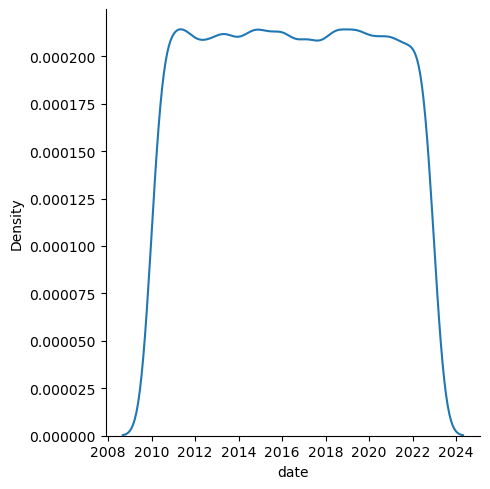

In [138]:
sns.displot(df, x='date', kind="kde")

### Nominal Data

In [139]:
df['user'].value_counts()

User_0269    71
User_0117    65
User_0057    65
User_0119    65
User_0734    64
             ..
User_0586    27
User_0150    25
User_0965    25
User_0453    23
User_0876    23
Name: user, Length: 1000, dtype: int64

In [140]:
df['pc'].value_counts()

PC_0272    117
PC_0480    115
PC_0069    115
PC_0045    114
PC_0354    113
          ... 
PC_0100     64
PC_0302     64
PC_0027     63
PC_0148     62
PC_0475     58
Name: pc, Length: 500, dtype: int64

<AxesSubplot:xlabel='Authority', ylabel='count'>

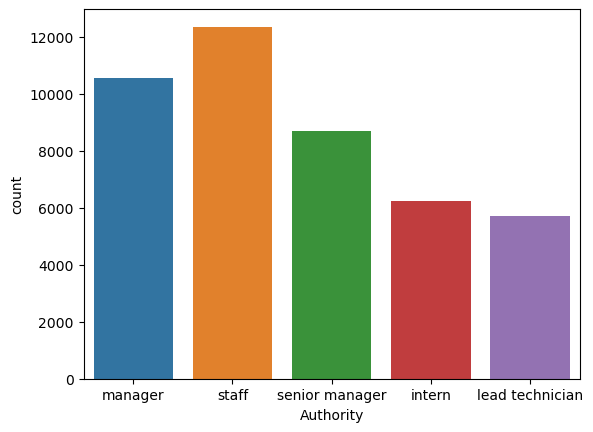

In [141]:
sns.countplot(data=df, x='Authority')

<AxesSubplot:xlabel='File Operation', ylabel='count'>

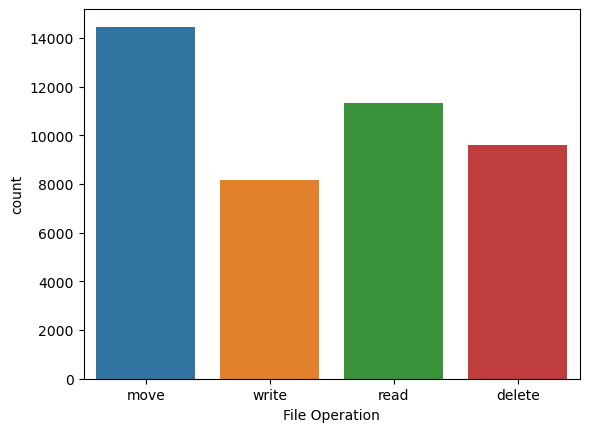

In [142]:
sns.countplot(data=df, x='File Operation')

### Ordinal Data

<AxesSubplot:xlabel='Data Sensitivity Level', ylabel='count'>

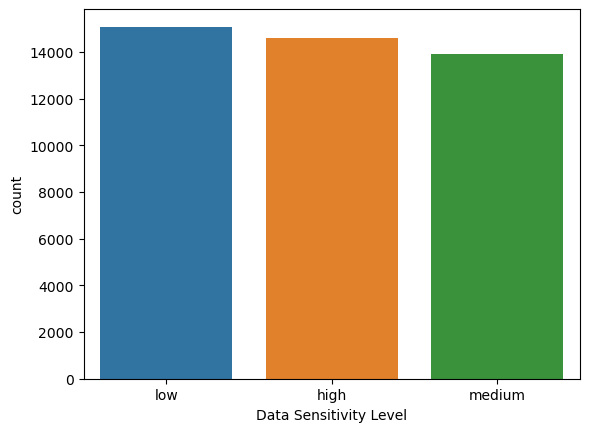

In [143]:
sns.countplot(data=df, x='Data Sensitivity Level')

### Binary data
- Through_pwd
- Through_pin
- Through_MFA
- Data Modification
- Confidential Data Access
- Confidential File Transfer
- External Destination
- Abnormality

In [144]:
df['External Destination'].value_counts(normalize=True)

internal    0.597337
external    0.402663
Name: External Destination, dtype: float64

In [145]:
(
    df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']]
    .apply(lambda col: col.value_counts(normalize=True), axis=0)
)

,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,Abnormality
0,0.729614,0.716827,0.512029,0.612144,0.666253,0.455257,0.687948
1,0.270386,0.283173,0.487971,0.387856,0.333747,0.544743,0.312052


## Multi-variate analysis

### Continuous data

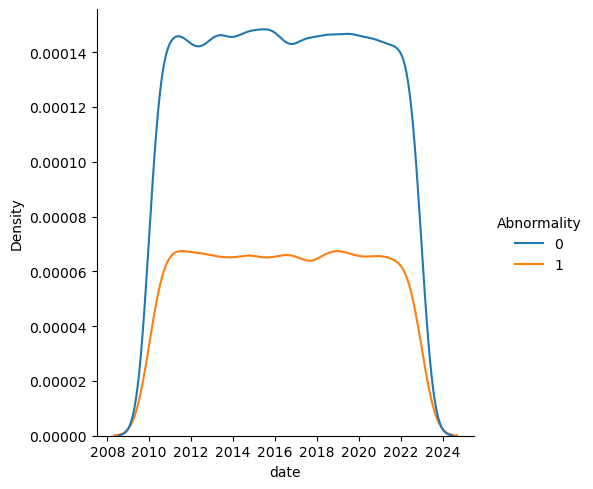

In [146]:
sns.displot(df, x='date', hue='Abnormality', kind="kde")

### Categorical data

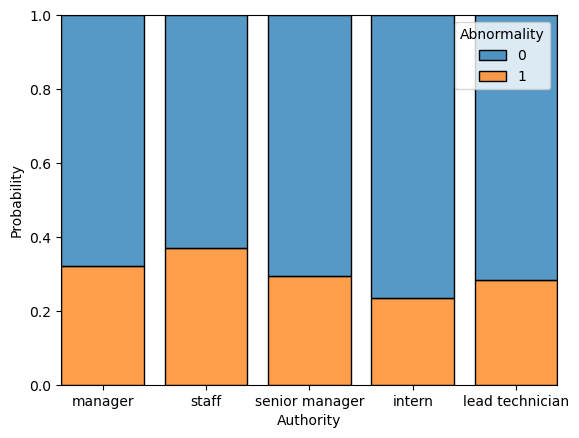

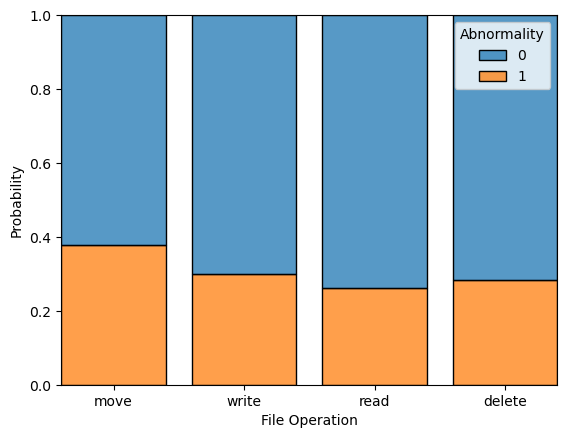

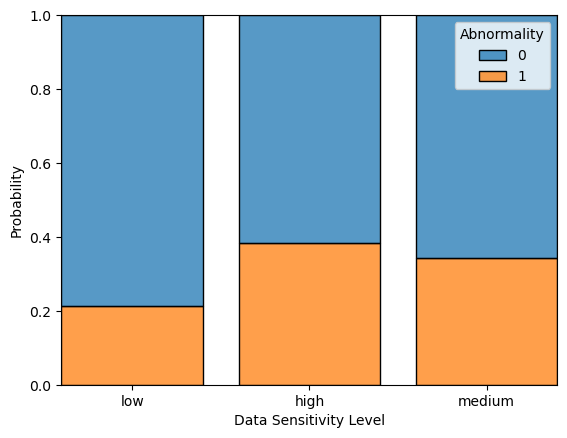

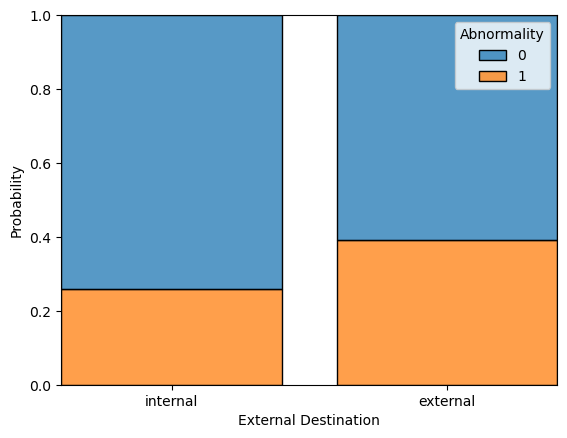

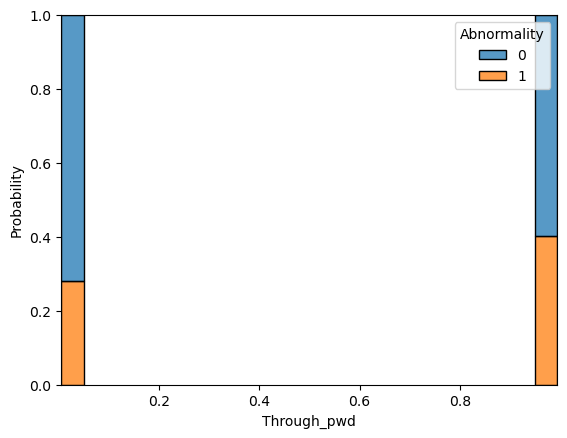

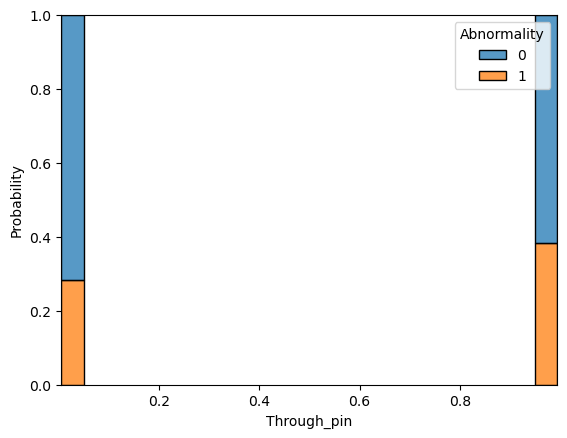

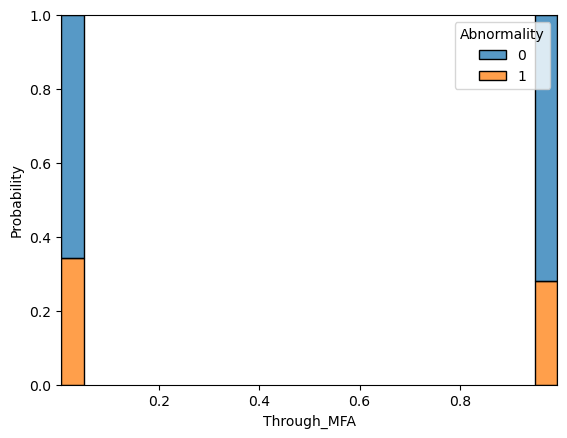

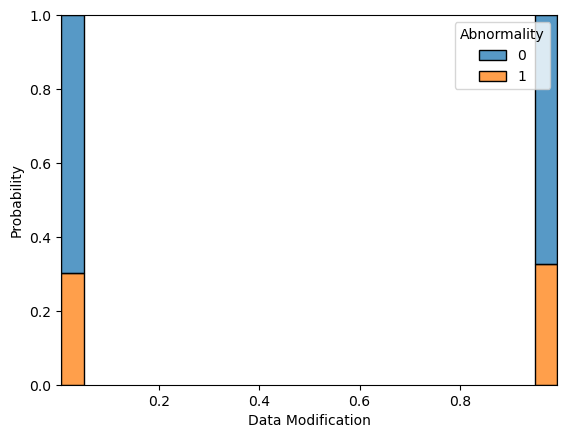

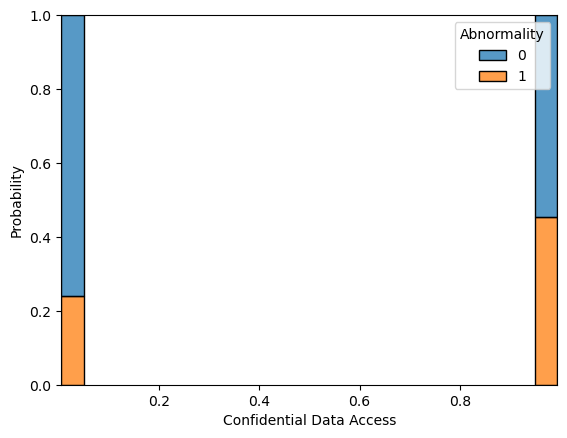

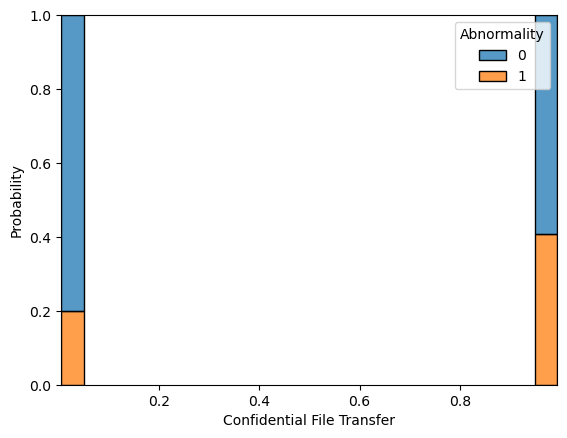

In [147]:
for col in ['Authority', 'File Operation', 'Data Sensitivity Level', 'External Destination', 'Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer']:
    plt.figure()
    sns.histplot(df, x=col, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)